# Guião Laboratorial: Regressão Linear

Uso da regressão linear a uma variável para previsão do preço de casas. 

Area, número de quarto, pisos e idade + preço


# Conteúdo
- [ 1 - Bibliotecas ](#1)
- [ 2 - _Dataset_ ](#2)
- [ 3 - Notas sobre regressão linear](#3)
- [ 4 - Cálculo da função de custo](#4)
 - [ Exercício 1](#ex01)
- [ 5 - Descida do gradiente](#5)
    - [ Exercício 2](#ex02)
- [ 6 - Aprendizagem dos parâmetros usando a descida do gradiente](#6)
- [ 7 - Sistema SERT](#5)

<a name="1"></a>
## 1 - Bibilotecas 

Importar as bibliotecas necessárias para o tutorial.

In [561]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## 2 - _Dataset_

Carregar o _dataset_ (conjunto de dados) a ser usado: 
  - `x_train` é a área da casa
  - `y_train` é o preço das casas     

In [562]:
# carregar dataset
data = np.loadtxt("houses.txt", delimiter=',')
x_train = data[:,0]*0.092903   # feature - área: ft^2 -> m^2
y_train = data[:,4]            # saída - preço

#### Visualização das variáveis

In [563]:
# imprime x_train
print("Tipo de variável de x_train:",type(x_train))
print("Primeiros 5 elementos de x_train são:\n", x_train[:5]) 

Tipo de variável de x_train: <class 'numpy.ndarray'>
Primeiros 5 elementos de x_train são:
 [ 88.443656 115.571332 180.882141 160.257675 181.996977]


`x_train` é um _array_ `numpy` que contém valores reais positivos.
- Estes valores representam a área das casas em metros quadrados 

In [564]:
# imprime y_train
print("Tipo de variável de y_train:",type(y_train))
print("Primeiros 5 elementos de y_train são:\n", y_train[:5])  

Tipo de variável de y_train: <class 'numpy.ndarray'>
Primeiros 5 elementos de y_train são:
 [271.5 300.  509.8 394.  540. ]


`y_train` é um _array_  `numpy` que contém valores reais positivos.
- Estes valores representam o preço das casas, em unidades de 1000.
  - Por exemplo, 230 representa 230 000 dólares.  

#### Verificar as dimensões das variavéis

In [565]:
print ('A dimensão de x_train é:', x_train.shape)
print ('A dimensão de y_train é: ', y_train.shape)
print ('Número de exemplos de treino (m):', len(x_train))

A dimensão de x_train é: (100,)
A dimensão de y_train é:  (100,)
Número de exemplos de treino (m): 100


#### Visualização dos dados

É útil perceber o tipo de dados através da sua visualização.  

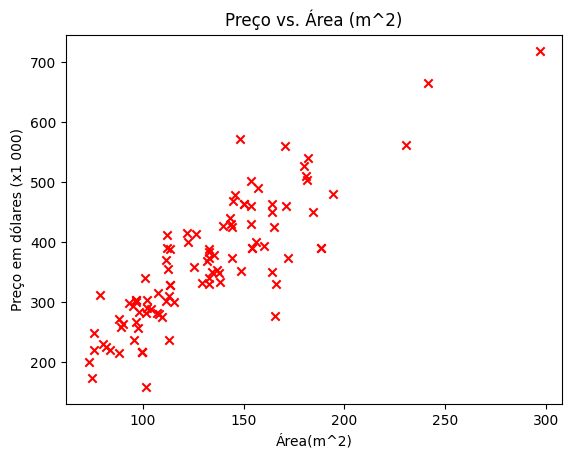

In [566]:
# Gráfico dos dados
plt.scatter(x_train, y_train, marker='x', c='r') 

# Labels
plt.title("Preço vs. Área (m^2)")
plt.ylabel('Preço em dólares (x1 000)')
plt.xlabel('Área(m^2)')
plt.show()

O objetivo é obter um modelo de regressão linear que aproxime os dados.
- Com este modelo, pode-se colocar como entrada a área da casa, e o modelo estima o preço correspondente da casa.

<a name="4"></a>
## 3 - Notas sobre regressão linear

Neste tutorial, os parâmetros de regressão linear $(w,b)$ irão ser ajustados ao seu _dataset_.
- A função do modelo para regressão linear, que é uma função que mapeia de `x` (área da casa) para `y` (preço da casa) é representada como
     $$f_{w,b}(x) = wx + b$$

- Para treinar um modelo de regressão linear, o objetivo é encontrar os melhores parâmetros $(w,b)$ que se ajustem ao seu _dataset_.

     - Para comparar como uma escolha de $(w,b)$ é melhor ou pior que outra escolha, é usada uma função de custo $J(w,b)$
       - $J$ é uma função de $(w,b)$. Ou seja, o valor do custo $J(w,b)$ depende do valor de $(w,b)$.
  
     - A escolha de $(w,b)$ que melhor se ajusta aos seus dados é aquela que tem o menor custo $J(w,b)$.


- Para encontrar os valores $(w,b)$ que obtenham o menor custo possível $J(w,b)$, pode ser usado um método chamado **descida do gradiente**.
   - A cada passo da descida do gradiente, os seus parâmetros $(w,b)$ aproximam-se dos valores ótimos que atingirão o menor custo $J(w,b)$.
 
- O modelo de regressão linear treinado pode então assumir a _feature_ de entrada $x$ (área da casa) e gerar uma previsão $f_{w,b}(x)$ (preço previsto para a casa).

<a name="5"></a>
## 5 - Cálculo da Função Custo

A descida do gradiente envolve passos repetidos para ajustar os valores dos seus parâmetros $(w,b)$ para obter gradualmente um valor de custo cada vez menor $J(w,b)$.
- Em cada passo da descida do gradiente, será útil monitorar seu progresso calculando o custo $J(w,b)$ à medida que $(w,b)$ é atualizado.
- Nesta seção, deverá ser implementada uma função para calcular $J(w,b)$ para que se possa verificar o progresso da implementação da descida do gradiente.

#### Função custo
A função de custo para a regressão linear $J(w,b)$ a uma variável é definida como

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- Pode-se pensar em $f_{w,b}(x^{(i)})$ como a previsão do modelo do preço da casa, em oposição a $y^{(i)}$, que é o preço real que é guardado nos dados.
- $m$ é o número de exemplos de treino no _dataset_

#### Previsão do modelo

- Para a regressão linear com uma variável, a previsão do modelo $f_{w,b}$ para um exemplo $x^{(i)}$ é representada como:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

Esta é a equação de uma reta, com uma interceptação $b$ e um declive $w$

#### Implementação

Complete a função `compute_cost()` abaixo para calcular o custo $J(w,b)$.

<a name="ex01"></a>
### Exercício 1

Complete a função `compute_cost` apresentada abaixo:

* Itere sobre os exemplos de treino e, para cada exemplo, calcule:

     * A previsão do modelo para esse exemplo
     $$
     f_{wb}(x^{(i)}) = wx^{(i)} + b
     $$
   
     * O custo para esse exemplo $$cost^{(i)} = (f_{wb} - y^{(i)})^2$$
    

* Retorne o custo total de todos os exemplos
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} custo^{(i)}$$
   * Aqui, $m$ é o número de exemplos de treino e $\sum$ é o operador de soma 

In [567]:
# compute_cost
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    print(m)
    
    # You need to return this variable correctly
    total_cost = 0

    ### INICIE O CÓDIGO AQUI ###

    for i in range(m):
        total_cost += (w*x[i] + b - y[i])**2
    
    total_cost = total_cost/(2*m)
    
    ### TERMINE O CÓDIGO AQUI ### 

    return total_cost

# testando compute_cost
w_i = 2
b_i = 20
cost = compute_cost(x_train, y_train, w_i, b_i)

print("Custo:" , cost)


100
Custo: 4684.964440444753


<a name="6"></a>
## 5 - Descida do Gradiente

Nesta seção, irá ser implementado o gradiente para os parâmetros $w, b$ para a regressão linear.

O algoritmo de descida gradiente é:

$$\begin{align*}& \text{repetir até convergir:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

onde, os parâmetros $w, b$ são atualizados simultaneamente e onde
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* $m$ é o número de exemplos de treino no _dataset_

    
*  $f_{w,b}(x^{(i)})$ é a previsão do modelo, enquanto $y^{(i)}$, é o valor alvo 

Deverá ser implementada uma função chamada `compute_gradient` que calcula $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$

<a name="ex02"></a>
### Exercício 2

Complete a função `compute_gradient` para:

* Itere sobre os exemplos de treino e, para cada exemplo, calcule:
    * A previsão do modelo para esse exemplo 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * O gradiente para os parâmetros $w, b$ desse exemplo 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Retorne a atualização total do gradiente de todos os exemplos
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Aqui, $m$ é o número de exemplos de treinamento e $\sum$ é o operador de soma

In [568]:
# compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### INICIE O CÓDIGO AQUI ### 
    

    for i in range(m):
        dj_db += (w*x[i] + b - y[i])
        dj_dw += (w*x[i] + b - y[i])*x[i]
    
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    
    ### TERMINE O CÓDIGO AQUI ### 
        
    return dj_dw, dj_db

<a name="2.6"></a>
## 6 - Aprendizagem dos parâmetros usando a descida do gradiente 

Agora irá ser encontrado os parâmetros ótimos de um modelo de regressão linear usando a descida do gradiente (em lote). A designação de "lote" refere-se à execução de todos os exemplos em uma iteração.
- Não é necessário implementar qualquer código. Basta correr as células abaixo.

- Uma forma de verificar se a descida gradiente está funcionando corretamente é visualizar
 o valor de $J(w,b)$ e verificar se este está diminuindo a cada iteração.

- Supondo que o gradiente e a função custo está implementada corretamente e tem um valor apropriado para a taxa de aprendizagem $\alpha$, $J(w,b)$ nunca deve aumentar e deve convergir para um valor estável ao final do algoritmo.

In [569]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Agora vamos executar o algoritmo da descida do gradiente para aprender os parâmetros do nosso _dataset_.

In [570]:
# inicializar os parâmetros de ajuste
initial_w = 0.2
initial_b = 20

# parâmetros da descida do gradiente
iterations = 2500
alpha = 0.0001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("Valores de w,b encontrados pela descida do gradiente:", w, b)

100
Iteration    0: Cost 41907.01   
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100

Os parâmetros finais da descida do gradiente são agora usados para o gráfico do ajuste linear.

Lembre-se de que podemos obter a previsão para um único exemplo $f(x^{(i)})= wx^{(i)}+b$.

Para calcular as previsões em todo o _dataset_, podemos percorrer todos os exemplos de treino e calcular a previsão para cada exemplo. Isso é mostrado no bloco de código abaixo.

In [571]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Agora representamos graficamente os valores previstos para ver o ajuste linear.

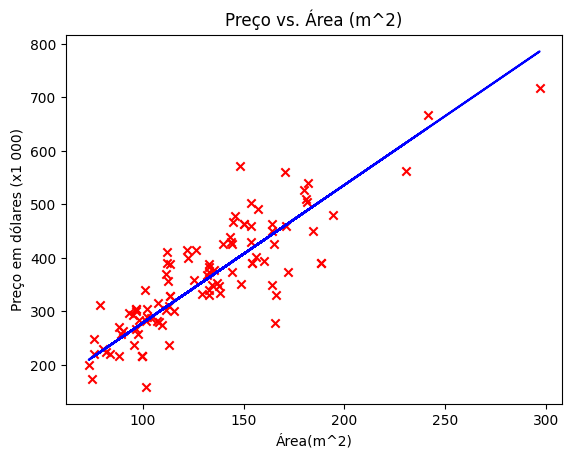

In [572]:
# Gráfico do ajuste linear
plt.plot(x_train, predicted, c = "b")

# Gráfico dos dados 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Labels
# Labels
plt.title("Preço vs. Área (m^2)")
plt.ylabel('Preço em dólares (x1 000)')
plt.xlabel('Área(m^2)')
plt.show()

Os valores finais de $w,b$ podem ser usados para fazer previsões sobre o preço das casas. Vamos prever qual seria o preço de casa com 125 $\rm{m^2}$ e 220 $\rm{m^2}$.

- O modelo considera a área como entrada.

- Portanto, 125 $\rm{m^2}$ podem ser traduzidas em uma entrada para o modelo como `np.array([125])`

- Da mesma forma, 220 $\rm{m^2}$ podem ser traduzidas em uma entrada para o modelo como `np.array([220])`

In [573]:
predict1 = 125 * w + b
print('Para uma área = 125, a previsão do preço é $%.2f' % (predict1*1000))

predict2 = 220 * w + b
print('Para uma área = 220, a previsão do preço é $%.2f' % (predict2*1000))

Para uma área = 125, a previsão do preço é $343096.53
Para uma área = 220, a previsão do preço é $588100.40


# 7 - Sistema SERT




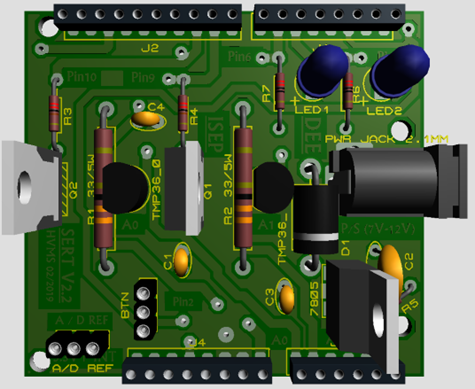





Defina o sistema 1 (`T1`) para 80% e o sistema 2 (`T2`) para 60%. Obtenha as temperaturas de ambos os sistemas a cada 0.5 segundos durante 50 segundos. Guarde os valores de tempo (`t`), temperatura do sensor 1 (`T_S1`) e temperatura do sensor 2 (`T_S2`) em matrizes `numpy`. 

In [574]:
dados = np.loadtxt("dados_reglinear.txt", delimiter=',')

x_test = dados[:,0]
s1 = dados[:,1]
s2 = dados[:,2]


### Regressão linear

Obtenha um modelo linear para `T_S1` usando regressão. Siga os mesmos pontos que no caso anterior do preço das casas.

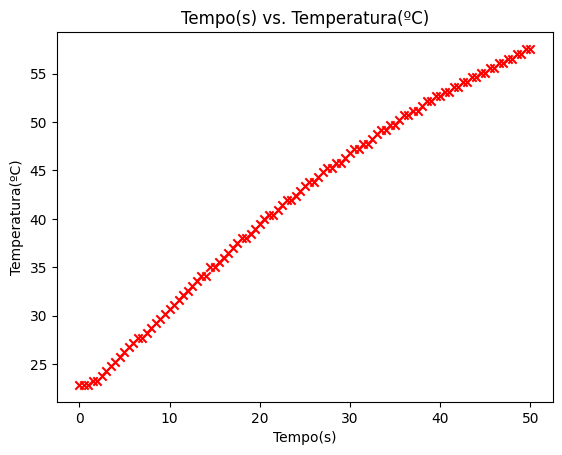

In [575]:
# Gráfico dos dados
plt.scatter(x_test, s1, marker='x', c='r')

# Labels
plt.title("Tempo(s) vs. Temperatura(ºC)")
plt.ylabel('Temperatura(ºC)')
plt.xlabel('Tempo(s)')
plt.show()

In [576]:
# inicializar os parâmetros de ajuste
initial_w = 0.2
initial_b = 20

# parâmetros da descida do gradiente
iterations = 2500
alpha = 0.0001

w,b,_,_ = gradient_descent(x_test ,s1, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("Valores de w,b encontrados pela descida do gradiente:", w, b)

101
Iteration    0: Cost   145.52   
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101

In [577]:
m = x_test.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_test[i] + b

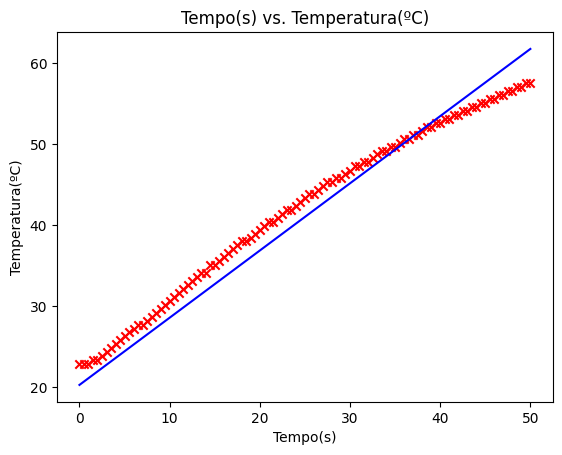

In [578]:
# Gráfico do ajuste linear
plt.plot(x_test, predicted, c = "b")

# Gráfico dos dados 
plt.scatter(x_test, s1, marker='x', c='r') 

# Labels
plt.title("Tempo(s) vs. Temperatura(ºC)")
plt.ylabel('Temperatura(ºC)')
plt.xlabel('Tempo(s)')
plt.show()


### Regressão linear

Obtenha um modelo linear para `T_S2` usando regressão. Siga os mesmos pontos que no caso anterior do preço das casas.

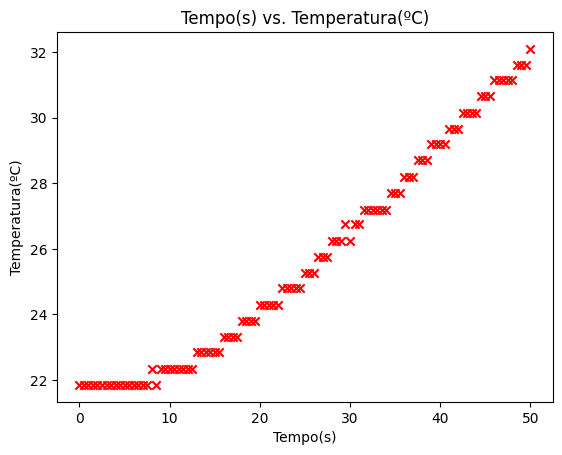

In [579]:
# Gráfico dos dados
plt.scatter(x_test, s2, marker='x', c='r')

# Labels
plt.title("Tempo(s) vs. Temperatura(ºC)")
plt.ylabel('Temperatura(ºC)')
plt.xlabel('Tempo(s)')
plt.show()

In [580]:
# inicializar os parâmetros de ajuste
initial_w = 0.2
initial_b = 20

# parâmetros da descida do gradiente
iterations = 2500
alpha = 0.0001

w,b,_,_ = gradient_descent(x_test ,s2, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("Valores de w,b encontrados pela descida do gradiente:", w, b)

101
Iteration    0: Cost     0.43   
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101

In [581]:
m = x_test.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_test[i] + b

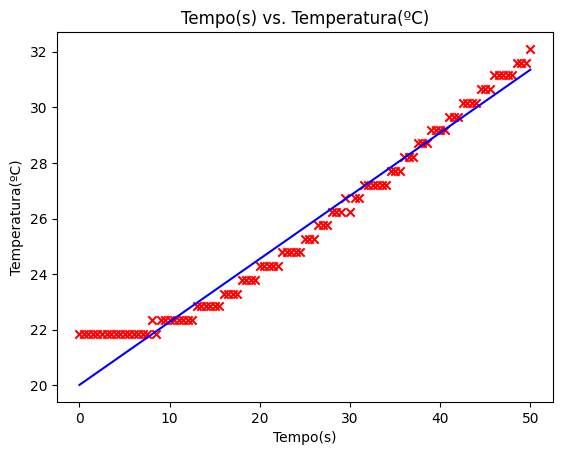

In [582]:
# Gráfico do ajuste linear
plt.plot(x_test, predicted, c = "b")

# Gráfico dos dados 
plt.scatter(x_test, s2, marker='x', c='r') 

# Labels
plt.title("Tempo(s) vs. Temperatura(ºC)")
plt.ylabel('Temperatura(ºC)')
plt.xlabel('Tempo(s)')
plt.show()